<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-370: Ψηφιακή Επεξεργασία Σημάτων
## Χειμερινό Εξάμηνο 2023-2024
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής

## Ανάθεση: 8 Δεκέμβρη 2023
## Παράδοση: 22 Δεκέμβρη 2023, 23:59:59
(ο τρόπος παράδοσης βρίσκεται στο τέλος του αρχείου αυτού)

In [1]:
import numpy as np
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict
import scipy.signal as sig
import scipy.special as sp
import matplotlib.pyplot as plt
from  matplotlib import patches
from IPython.display import Audio      # βιβιοθήκη για να "παίζουμε" ήχους (μεταξύ άλλων)
from scipy import signal
from scipy.special import iv
from scipy.io import wavfile

# Άσκηση 1 - Σχεδίαση IIR Φίλτρων μέσω του Αναλογικού Χώρου

Στις διαλέξεις είδατε δυο διαφορετικούς τρόπους µε τους οποίους µπορείτε να υλοποιήσετε ψηφιακά φίλτρα από
προδιαγραφές που σας δίνονται (ή που ορίζετε εσείς), χρησµοποιώντας γνώσεις από τη σχεδίαση φίλτρων στο συνεχή
χρόνο. Εδώ θα υλοποιήσουµε αυτά τα φίλτρα τόσο µε αναλυτικό όσο και µε σύντοµο τρόπο, και θα εφαρµόσουµε
σήµατα φωνής στην είσοδό τους, ώστε να ακούσουµε το αποτέλεσµα που αυτά παράγουν.


## I. <u>Impulse Invariance-based Butterworth Filter</u>

  Η τεχνική του **Impulse Invariance (II)** περιγράφει το πως από ένα φίλτρο συνεχούς χρόνου $h_{c}(t)$ μπορεί κανείς να υλοποιήσει το αντίστοιχο διακριτού χρόνου $h[n]$, απλά δειγματοληπτώντας την κρουστική του απόκριση φίλτρου συνεχούς χρόνου $h_{c}(t)$. Είδαμε ότι αν το φίλτρο του συνεχούς χρόνου με κρουστική απόκριση $h_c(t)$ δίνεται στο χώρο του Laplace ως
    
$$H_{c}(s) = \sum_{k=1}^{N}\frac{A_{k}}{s-s_{k}}\tag{1}$$

τότε η μέθοδος (II) μετατρέπει το φίλτρο αυτό σε διακριτού χρόνου $h_{c}[n]$ με μετασχ. Ζ $H(z)$ ως

$$H(z) = \sum_{k=1}^{N}\frac{A_{k}}{1-e^{s_{k}T_{d}}z^{-1}}\tag{2}$$

με $T_{d}$ την περίοδο δειγματοληψίας του φίλτρου. Με άλλα λόγια, κάθε όρος της μορφής $$\frac{A_{k}}{s-s_{k}}$$ της συνάρτησης μεταφοράς $H_{c}(s)$ αντιστοιχίζεται σε έναν όρο της μορφής $$\frac{A_{k}}{1-e^{s_{k}T_{d}}z^{-1}}$$ της συνάρτησης μεταφοράς $H(z)$.

---


(α') Υλοποιήστε με αναλυτικό τρόπο - υπολοποιώντας πρώτα το αντίστοιχο φίλτρο συνεχούς χρόνου - ένα ψηφιακό χαμηλοπερατό Butterworth φίλτρο, με προδιαγραφές που συζητήσαμε στις διαλέξεις. Προς διευκόλυνσή σας, θυμίζεται ότι το φίλτρο αυτό έχει προδιαγραφές

$$0.89125 \leq |H(e^{j\omega})| \leq 1, \ \ 0 \leq |\omega| \leq 0.2 \pi \tag{3}$$

$$|H(e^{j\omega})| \leq 0.17783, \ \  0.3\pi \leq |\omega| \leq \pi \tag{4}$$

Εφ'όσον η περίοδος δειγματοληψίας $T_{d}$ δεν έχει σημασία στη μέθοδο αυτή, θεωρήστε ότι $T_{d} = 1$. Με αυτόν τον τρόπο, η "διακριτή" συχνότητα $\omega$ αντιστοιχεί στη "συνεχή" συχνότητα $\Omega$, δηλ.

$$\Omega = \omega \tag{5}$$

Άρα οι παραπάνω προδιαγραφές μετατρέπονται ως

$$0,89125 \leq |H(j\Omega)| \leq 1, \ \ 0 \leq |\Omega| \leq 0.2 \pi \tag{6}$$

$$|H(j\Omega)| \leq 0.17783, \ \ 0.3 \pi \leq |\Omega| \leq \pi \tag{7}$$


Αυτές είναι προδιαγραφές του φίλτρου συνεχούς χρόνου, το οποίο πρέπει να υλοποιήσετε ρητά, και μετά να το μετατρέψετε σε διακριτού χρόνου με τη μέθοδο της Impulse Invariance. Εν συντομία, πρέπει να λύσετε στο χαρτί σας τις εξισώσεις που υπολογίζουν τις παραμέτρους $N, \Omega_{c}$ του αναλογικού φίλτρου Butterworth στο χώρο του Fourier: αυτές σας δόθηκαν, και δεδομένου ότι το Butterworth φίλτρο είναι της μορφής

$$|H_{c}(j\Omega)|^{2} = \frac{1}{1 + \Big(\frac{\Omega}{\Omega_{c}}\Big)^{2N}} \tag{8}$$

αυτές οι εξισώσεις είναι

$$ 1 + \Big(\frac{0.2 \pi}{\Omega_{c}}\Big)^{2N} = \Bigg(\frac{1}{0.89125}\Bigg)^2 \tag{9}$$

$$1 + \Big(\frac{0.3 \pi}{\Omega_{c}}\Big)^{2N} = \Big(\frac{1}{0.17783}\Big)^{2} \tag{10}$$


και προέρχονται από την ισότητα στις προδιαγραφές (6, 7).

- Λύστε αναλυτικά το παραπάνω σύστημα στο χαρτί σας και βρείτε ότι $N = 5.8858$ και $\Omega_{c} = 0.70474$. Χρησιμοποιήστε την Python ως αριθμομηχανή ή μια πραγματική αριθμομηχανή. Μεταφέρετε τις λύσεις των εξισώσεων - **όχι τους τελικούς αριθμούς αλλά τις τελικές εξισώσεις, έτσι ώστε αν κάποιος αλλάξει τις τιμές $0.2$, $0.3$ ή $0.89125$, $0.17783$, ο κωδικάς σας να εξακολουθεί να λειτουργεί!!** - στο κελί κώδικα λίγο παρακάτω.

- To $N$ πρέπει να είναι ακέραιος , οπότε θέστε το $N$ ως το άνω ακέραιο μέρος της τιμής που βρήκατε. Υπολογίστε ξανά την τιμή της $\Omega_{c}$ και βρείτε τη ίση με $0.7032$.

---
<u>**Απάντηση:**</u>

Εφόσον η περίοδος δειγματοληψίας $T_d$ δεν έχει σημασία σε αυτή τη μέθοδο, θεωρούμε ότι $T_d = 1$. Έτσι, προκύπτει ότι $\Omega = \omega$, οπότε οι προδιαγραφές του φίλτρου Butterworth θα είναι:

$$0.89125 \leq |H(j\Omega)| \leq 1, \ \ 0 \leq |\Omega| \leq 0.2\pi$$
$$|H(j\Omega)| \leq 0.17783, \ \ 0.3\pi \leq |\Omega| \leq \pi$$

Λύνουμε τις εξισώσεις που υπολογίζουν τις παραμέτρους $N, \Omega_{c}$ του Butterworth στο χώρο του Fourier και τις περνάμε στην Python παρακάτω.

---

In [45]:
# Specifications
wp = 0.2 * np.pi
ws = 0.3 * np.pi
d1 = 0.89125
d2 = 0.17783

# Does not matter
Td = 1

# Parameter Calculation
# Solve 2x2 system for (N, Wc)

# Use np.log10 and np.power if necessary
N = np.floor(np.log10((1/d2**2 - 1)/(1/d1**2 - 1)) / (2 * np.log10(ws/wp)))

# Calculate Wc
Wc = wp / (np.power((1/d1**2 - 1), 1/(2*N)))

Από τα παραπάνω, βρείτε τους πόλους $s_{k}$ του φίλτρου Butterworth, μεταφέροντας την εξίσωση του φίλτρου στο χώρο του Laplace: γνωρίζετε την εξίσωση των πόλων από τις διαλέξεις. Προγραμματίστε τους πόλους αυτούς στην Python σε επόμενο κελί κώδικα.

**<u>Απάντηση:</u>**

In [46]:
# Poles
k = np.arange(0, int(N))
sk = Wc * np.exp(1j * (np.pi / (2 * N) + (2 * k + 1) * np.pi / (2 * N)))

Χρησιμοποιήστε την παρακάτω συνάρτηση - απλά εκτελώντας το παρακάτω κελί - για να τυπώσετε το διάγραμμα πόλων-μηδενικών, με βάση τους πόλους που βρήκατε.

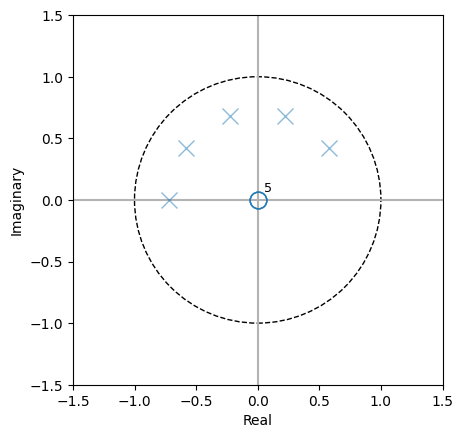

In [47]:
def zplane(z, p):
    """Plot the complex z-plane given zeros and poles.
    """

    # get a figure/plot
    ax = plt.subplot(1, 1, 1)

    # Add unit circle and zero axes
    unit_circle = patches.Circle((0,0), radius=1, fill=False, color='black', ls='--', alpha=1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')

    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=12, alpha=0.5)

    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=12,
             color='none', alpha=0.5,
             markeredgecolor=poles[0].get_color(), # same color as poles
             )

    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])

    """
    If there are multiple poles or zeros at the same point, put a
    superscript next to them.
    """
    # Finding duplicates by same pixel coordinates (hacky for now):
    poles_xy = ax.transData.transform(np.vstack(poles[0].get_data()).T)
    zeros_xy = ax.transData.transform(np.vstack(zeros[0].get_data()).T)

    # dict keys should be ints for matching, but coords should be floats for
    # keeping location of text accurate while zooming

    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in poles_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, r' ${}^{' + str(value) + '}$', fontsize=13)

    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in zeros_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, r' ${}^{' + str(value) + '}$',fontsize=13)

    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.show()

# Call zplane with 12 zeros and the 12 poles you have found
zplane(np.array(np.zeros(len(sk))), np.array(sk))


Κρατήστε μόνο αυτούς που αντιστιχούν σε ευσταθές και αιτιατό φίλτρο: από το σύνολο των πόλων που προγραμματίσατε στην Python, επιλέξτε μόνο τους απαραίτητους, δηλ. όσους βρίσκονται στο αριστερό μιγαδικό ημιεπίπεδο του s-χώρου. Δείτε το σχήμα των διαλέξεών σας. Χρησιμοποιήστε τη συνάρτηση $\textrm{np.real}$ επάνω στο διάνυσμα των πόλων sk που προγραμματίσατε πριν.

**<u>Απάντηση</u>**

In [48]:
# Get only the left-hand plane poles: sigma_k <0
sk = [sk for sk in sk if sk.real < 0]

Σχηματίστε το φίλτρο $B(s)/A(s)$ που δημιουργούν οι πόλοι που επιλέξατε: ο λόγος πολυωνύμων του $s$ θα φτιαχτεί ακριβώς όμοια με τα πολυώνυμα του $z^{-1}$ που γνωρίζετε πως κατασκευάζονται στην Python, δηλ. χρησιμοποιώντας τους συντελεστές του μόνο σε διανύσματα $B$ και $A$. Για παράδειγμα, αν θέλω να σχηματισω το πολυώνυμο δευτέρου βαθμού μεταξύ των όρων $(s-s_1)$ και $(s-s_2)$ τότε θα γράψω

```python
a = np.convolve([1, -s1], [1, -s2])
```

**<u>Απάντηση</u>**

In [49]:
# Continuous time filter:
B = Wc**N  # Numerator

length = len(sk)
A = 1

for pole in sk:
    A = np.convolve(A, [1, -pole])

Έχοντας πλέον το φίλτρο συνεχούς χρόνου (τους συντελεστές πολυωνύμων του $s$ αριθμητή $B$ και παρανομαστή $A$ αντίστοιχα) χρησιμοποιήστε τις εντολές **cont2discrete, freqz, group_delay** της βιβλιοθήκης scipy.signal για να μετατρέψετε το αναλογικό φίλτρο σε ψηφιακό και να δείτε την απόκριση πλάτους και την καθυστέρηση ομάδας αντίστοιχα. Εκτελέστε απλά το παρακάτω κελί.

**<u>Απάντηση</u>**

<ipython-input-50-b03fd312f1ba>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


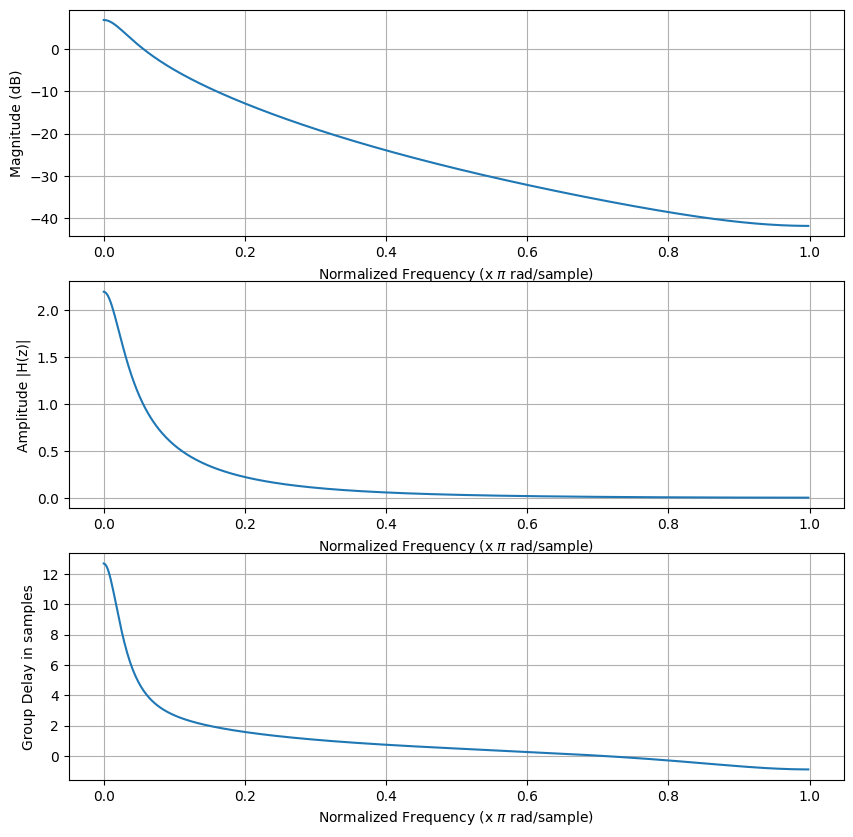

In [50]:
# Impulse invariance method --> Transformation from analog [B,A] to digital [Bz, Az]
fs = 1 # sampling frequency: does not matter

dt = 1/fs
num_d, den_d, _ = sig.cont2discrete((B, A), dt, method="impulse")

# Convert to numerator/denominator form - use sig.zpk2tf
Bz, Az = sig.zpk2tf([], np.roots(den_d), num_d)

# Frequency response - use function sig.freqz
w, H = sig.freqz(b=Bz.T, a=np.real(Az), worN=512)

# Group delay - use function sig.group_delay
w, Gd = sig.group_delay((Bz.flatten(), np.real(Az).flatten()), w=512)

plt.figure(figsize=(10, 10))
plt.title("Exercise 1 - II filter)")
plt.subplot(3, 1, 1)
plt.plot(w/np.pi, 20*np.log10(abs(H))) # Divide with pi for an easier check
plt.grid()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Normalized Frequency (x $\pi$ rad/sample)")

plt.subplot(3, 1, 2)
plt.plot(w/np.pi, abs(H))
plt.grid()
plt.ylabel('Amplitude |H(z)|')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.subplot(3, 1, 3)
plt.plot(w/np.pi, Gd)
plt.grid()
plt.ylabel('Group Delay in samples')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.show()

(β΄) Όλα αυτά που κάνετε ρητά στο παραπάνω αρχείο μπορούν να γίνουν και χωρίς όλη την παραπάνω αναλυτική διαδικασία, πιο εύκολα, με χρήση έτοιμων συναρτήσεων. Σας δίνουμε τις εντολές, απλά τρέξτε το παρακάτω κελί:

<ipython-input-51-6a1b779bcc41>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


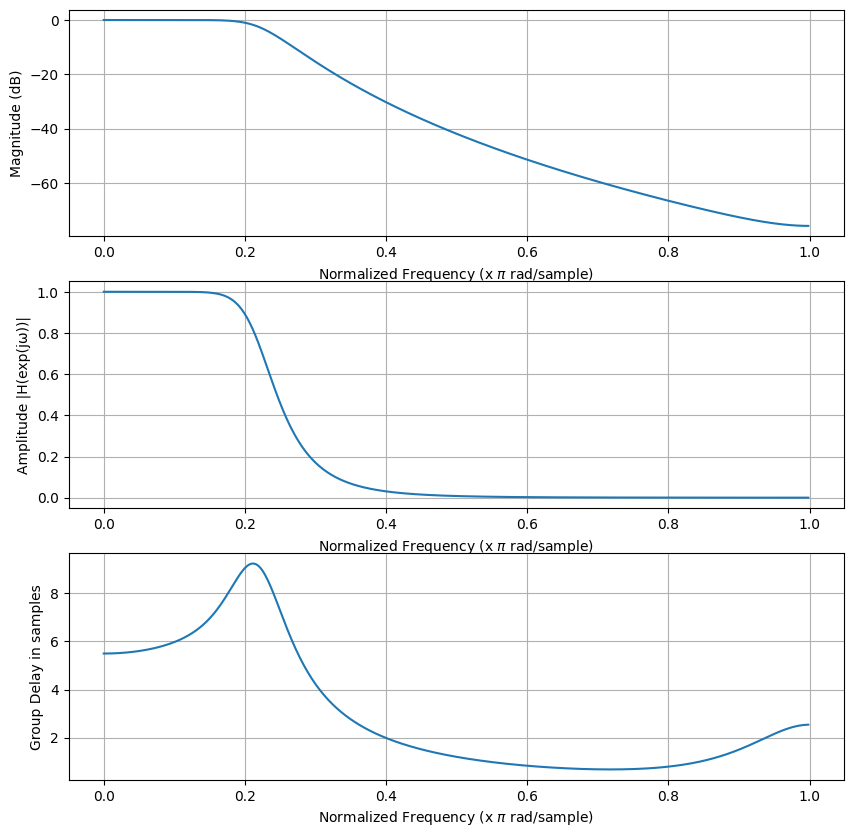

In [51]:
fs = 1 # sampling frequency: does not matter
Wp = wp*fs
Ws = ws*fs

# Find optimum N, Wc in analog domain
Nm, Wcm = sig.buttord(wp=Wp, ws=Ws, gpass=-20*np.log10(d1), gstop=-20*np.log10(d2), analog=True)

# Constructs the filter in analog domain
Bm, Am = sig.butter(N=Nm, Wn=Wcm, analog=True)

dt = 1/fs
# Convert to discrete using impulse invariance
num_d, den_d, _ = sig.cont2discrete((Bm, Am), dt, method="impulse")

# Get poles and zeros
Bzm, Azm = sig.zpk2tf([], np.roots(den_d), num_d) # Analog -> Digital

w, Hm = sig.freqz(b=Bzm.T, a=Azm, worN=512)

w, Gdm = sig.group_delay((Bzm.flatten(), Azm.flatten()), w=512)

plt.figure(figsize=(10, 10))
plt.title('Exercise 1 - II')
plt.subplot(3, 1, 1)
plt.plot(w/np.pi, 20*np.log10(abs(Hm))) # Divide with pi for easier check
plt.grid()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Normalized Frequency (x $\pi$ rad/sample)")

plt.subplot(3, 1, 2)
plt.plot(w/np.pi, abs(Hm))
plt.grid()
plt.ylabel('Amplitude |H(exp(jω))|')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.subplot(3, 1, 3)
plt.plot(w/np.pi, Gdm)
plt.grid()
plt.ylabel('Group Delay in samples')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.show()

Περάστε το σήµα ϕωνής που σας δίνεται (speech.wav) µέσα από το παραπάνω φίλτρο (εντολή sig.lfilter).

**<u>Απάντηση</u>**


In [52]:
filename = 'speech.wav'
fs, s = wavfile.read('./' + filename)        # διαβάζουμε το συνοδευτικό wav αρχείο
s = s / (2**15)                              # κανονικοποίηση
Audio(s.T, rate=fs)                          # ακούμε! :)

In [53]:
y = sig.lfilter(np.squeeze(Bzm), Azm, s)                # our filter

Ας το ακούσουμε:

In [54]:
Audio(y.T, rate=fs)                          # ακούμε! :)

## II. <u>Bilinear Transform-Based Butterworth Filter</u>
Η τεχνική του Bilinear Transformation (BT) αποφεύγει το εγγενές πρόβλημα του aliasing που υπάρχει στην μέθοδο της Impulse Invariance. Η τεχνική αυτή αντιστοιχεί τη συχνότητα $\infty \leq \Omega \leq \infty$ του συνεχούς χρόνου στη συχνότητα $-\pi \leq \omega \leq \pi$ του διακριτού χρόνου, μέσω του μη-γραμμικού μετασχηματισμού

$$s = \frac{2}{T_{d}}\Big(\frac{1 - z^{-1}}{1 + z^{-1}}\Big) \ \ \tag{11}$$
δηλ.
$$ H(z) = H_{c}\Big(\frac{2}{T_{d}}\Big(\frac{1-z^{-1}}{1+z^{-1}}\Big)\Big) \ \ \tag{12}$$

Οι παραπάνω σχέσεις οδηγούν (δείτε τις διαλέξεις ή το βιβλίο σας) στις σχέσεις
$$\Omega = \frac{2}{T_{d}}\tan (\omega / 2) \ \ \tag{13}$$
$$\omega = 2 \tan^{-1} (\Omega T_{d}/2) \ \ \tag{14}$$
---


(α') Χρησιμοποιώντας Python, υλοποιήστε με αναλυτικό τρόπο - υλοποιώντας πρώτα το αντίστοιχο φίλτρο στις διαλέξεις. Προς διευκόλυνσή σας, θυμίζεται ότι το φίλτρο έχεις τις προδιαγραφές
$$0.89125 \leq |H(e^{j\omega})| \leq 1,\ \ 0 \leq |\omega| \leq 0.2 \pi \ \ \tag{15}$$
$$|H(e^{j\omega})| \leq 0.17783, \ \ 0.3\pi \leq |\omega| \leq \pi \ \ \tag{16}$$

Εφ'οσον η περίοδος δειγματοληψίας $T_{d}$ δεν έχει σημασία και στη μέθοδο αυτή, θεωρήστε ότι $T_{d} = 1$. Με αυτόν τον τρόπο, η "διακριτή" συχνότητα $\omega$ αντιστοιχεί στη "συνεχή" συχνότητα $\Omega$ με τις σχέσεις

$$\Omega = 2 \tan (\omega /2) \ \ \tag{17}$$
$$\omega = 2 \tan^{-1} (\Omega / 2) \ \ \tag{18}$$

Άρα οι παραπάνω προδιαγραφές μετατρέπονται ως
$$0.89125 \leq |H(e^{j\omega})| \leq 1, \ \ 0 \leq \Omega \leq \frac{2}{T_{d}}\tan\left(\frac{0.2\pi}{2}\right) \ \ \tag{19}$$
$$|H(j\Omega)| \leq 0.17783, \ \ \frac{2}{T_{d}}\tan\left(\frac{0.3\pi}{2}\right) \leq |\Omega| \leq \infty \ \ \tag{20}$$

Αυτές είναι λοιπόν οι προδιαγραφές του φίλτρου Butterworth συνεχούς χρόνου, το οποίο πρέπει να υλοποιήσετε ρητά, και μετά να το μετατρέψετε σε διακριτού χρόνου.

Εν συντομία, λύστε στο χαρτί σας τις εξισώσεις που υπολογίζουν τις παραμέτρους $N$, $\Omega_{c}$ του αναλογικού φίλτρου στο χώρο του Fourier: αυτές σας δόθηκαν στο μάθημα, και -ξανά- δεδομένου ότι το Butterworth φίλτρο είναι της μορφής
$$|H_{c}(\Omega)|^{2} = \frac{1}{1+ \Big(\frac{\Omega}{\Omega_{c}}\Big)^{2N}} \ \ \tag{21}$$

Αυτές οι εξισώσεις είναι
$$1 + \Big(2 \frac{\tan(0.1 \pi)}{\Omega_{c}}\Big)^{2N} = \Big(\frac{1}{0.89125}\Big)^{2} \ \ \tag{22}$$
$$1 + \Big(2 \frac{\tan(0.15\pi)}{\Omega_{c}}\Big)^{2N} = \Big(\frac{1}{0.17783}\Big)^{2} \ \ \tag{23}$$
και προέρχονται από την ισότητα στις προδιαγραφές $(19,20)$.

- Λύστε αναλυτικά το παραπάνω σύστημα και βρείτε ότι $N = 5.305$. Χρησιμοποιήστε την Python ως αριθμομηχανή ή μια πραγματική αριθμομηχανή. Μεταφέρετε τις λύσεις των εξισώσεων - **όχι τους τελικούς αριθμούς αλλά τις τελικές εξισώσεις, έτσι ώστε αν κάποιος αλλάξει τις τιμές $0.2$, $0.3$ ή $0.89125$, $0.17783$, ο κωδικάς σας να εξακολουθεί να λειτουργεί!!** - στο κελί κώδικα λίγο παρακάτω.

- Το $N$ πρέπει να είναι ακέραιος, οπότε θέστε το $N$ ως το άνω ακέραιο μέρος της τιμής που βρήκατε. Υπολογίστε ξανά την τιμή της $\Omega_{c}$, για αυτή την νέα τιμή του $N$, και δείξτε ότι αυτή είναι $\Omega_{c} = 0.766$.

<u>**Απάντηση**</u>

Λύνουμε στο χαρτί τις εξισώσεις και τις περνάμε στην Python παρακάτω.

In [ ]:
# specifications
wp = 0.2 * np.pi
ws = 0.3 * np.pi
d1 = 0.89125
d2 = 0.17783

Td = 1
Wp = 2 * np.tan(wp / 2)
Ws = 2 * np.tan(ws / 2)

# parameter calculation
# solve 2x2 system for (N,Wc)
# DO NOT insert specific values but only code that does the work for wp, ws, d1, d2

# Use np.log, np.tan if necessary
N = np.log10((1/d2**2 - 1)/(1/d1**2 - 1)) / (2 * np.log10(Ws/Wp))

# Wc, use np.tan, np.power if necessary
Wc = Wp / (np.power((1/d1**2 - 1), 1/(2*N)))

# N must be an integer
N = np.ceil(N)

# Wc again, with new N
Wc = Wp / (np.power((1/d1**2 - 1), 1/(2*N)))

Από τα παραπάνω, βρείτε τους πόλους $s_{k}$ του φίλτρου Butterworth, μεταφέροντας την εξίσωσή του φίλτρου στον χώρο Laplace: γνωρίζετε την εξίσωση των πόλων από τις διαλέξεις. Οπότε απλά προγραμματίστε τους πόλους αυτούς στην Python.

<u>**Απάντηση**</u>

In [ ]:
# poles
k = np.arange(0, int(N))
sk = Wc * np.exp(1j * (np.pi / (2 * N) + (2 * k + 1) * np.pi / (2 * N)))

Κρατήστε μόνο αυτούς που αντιστοιχούν σε ευσταθές και αιτιατό φίλτρο: από το σύνολο των πόλων που προγραμματίσατε στην Python, επιλέξτε μόνο τους απαραίτητους, δηλ. όσους αριστερό μιγαδικό ημιεπίπεδο του s-χώρου. Δείτε το σχήμα των διαλέξεών σας. Χρησιμοποιήστε τη συνάρτηση $\textrm{np.real}$ επάνω στο διάνυσμα των πόλων sk που προγραμματίσατε πρίν.

<u>**Απάντηση**</u>

In [ ]:
# get only the upper LHP poles: sigma_k <0 & W_k >0
sk = sk_upper_lhp = [sk_i for sk_i in sk if np.real(sk_i) < 0 and np.imag(sk_i) > 0]

Σχηματίστε το φίλτρο $B(s)/A(s)$ που δημιουργούν οι πόλοι που επιλέξατε: ο λόγος πολυωνύμων του $s$ θα φτιαχτεί ακριβώς όμοια με τα πολυώνυμα του $z^{-1}$, όπως δείξαμε στην προηγούμενη μέθοδο, δηλ. χρησιμοποιώντας τους συντελεστές του μόνο σε διανύσματα $B$ και $A$.

**<u>Απάντηση</u>**

In [38]:
# Continuous time filter:
B = Wc**N  # Numerator

length = len(sk)
A = 1

for pole in sk:
    A = np.convolve(A, [1, -pole])

Έχοντας πλέον το φίλτρο συνεχούς χρόνου (τους συντελεστές πολυωνύμων του $s$ αριθμητή $B$ και παρανομαστή $A$ αντίστοιχα) χρησιμοποιήστε τις εντολές **bilinear, freqz, group_pdelay** για να μετατρέψετε το αναλογικό φίλτρο σε ψηφιακό και να δείτε την απόκριση πλάτους και την καθυστέρηση ομάδας αντίστοιχα. Τρέξτε απλά το παρακάτω κελί.

**<u>Απάντηση</u>**

<ipython-input-39-cf3293c82089>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


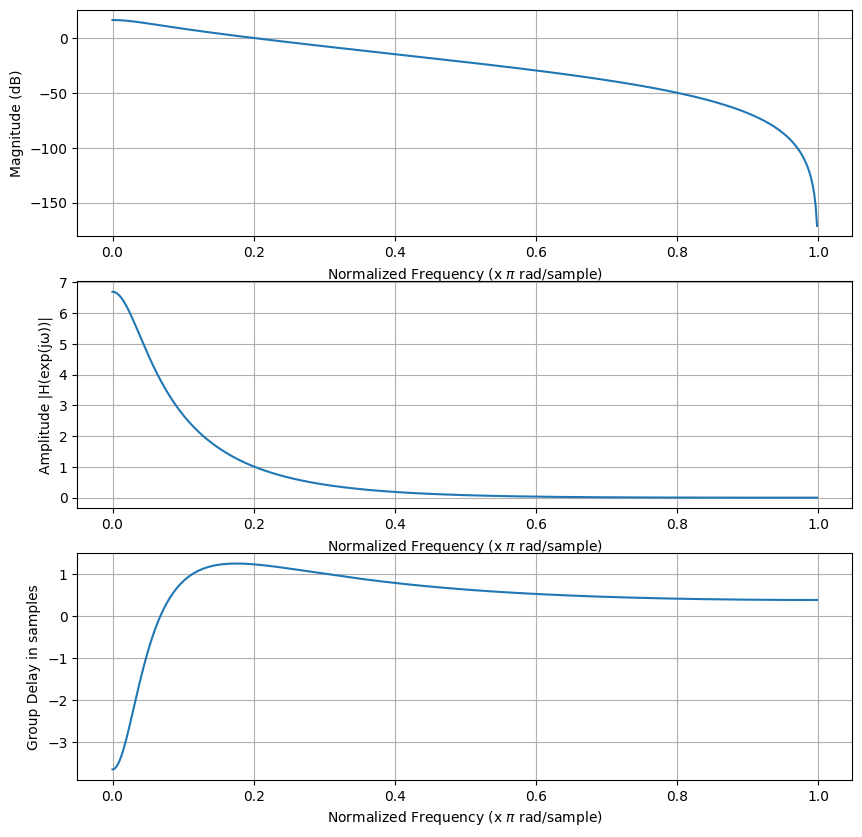

In [39]:
fs = 1 # sampling frequency in Hz: does not matter
Bz, Az = sig.bilinear(b=B, a=A, fs=fs)

#Frequency response - use function sig.freqz
w, H = sig.freqz(b=Bz.T, a=Az, worN=512)

# Group delay - use function sig.group_delay
w, Gd = sig.group_delay((Bz, Az), w=512)

plt.figure(figsize=(10, 10))
plt.title("Exercise 1 - BT")
plt.subplot(3, 1, 1)
plt.plot(w/np.pi, 20*np.log10(abs(H))) # Divide with pi for easier check
plt.grid()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Normalized Frequency (x $\pi$ rad/sample)")

plt.subplot(3, 1, 2)
plt.plot(w/np.pi, abs(H))
plt.grid()
plt.ylabel('Amplitude |H(exp(jω))|')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.subplot(3, 1, 3)
plt.plot(w/np.pi, Gd)
plt.grid()
plt.ylabel('Group Delay in samples')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.show()

(β') Όλα τα παραπάνω μπορούν να γίνουν και χωρίς όλη την παραπάνω διαδικασία, πιο εύκολα, με χρήση έτοιμων συναρτήσεων. Σας δίνουμε τις εντολές:

<ipython-input-40-b2d63f0c9977>:12: UserWarning: The filter's denominator is extremely small at frequencies [3.135],             around which a singularity may be present
  w, Gdm = sig.group_delay((Bzm, Azm), w=512)
<ipython-input-40-b2d63f0c9977>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


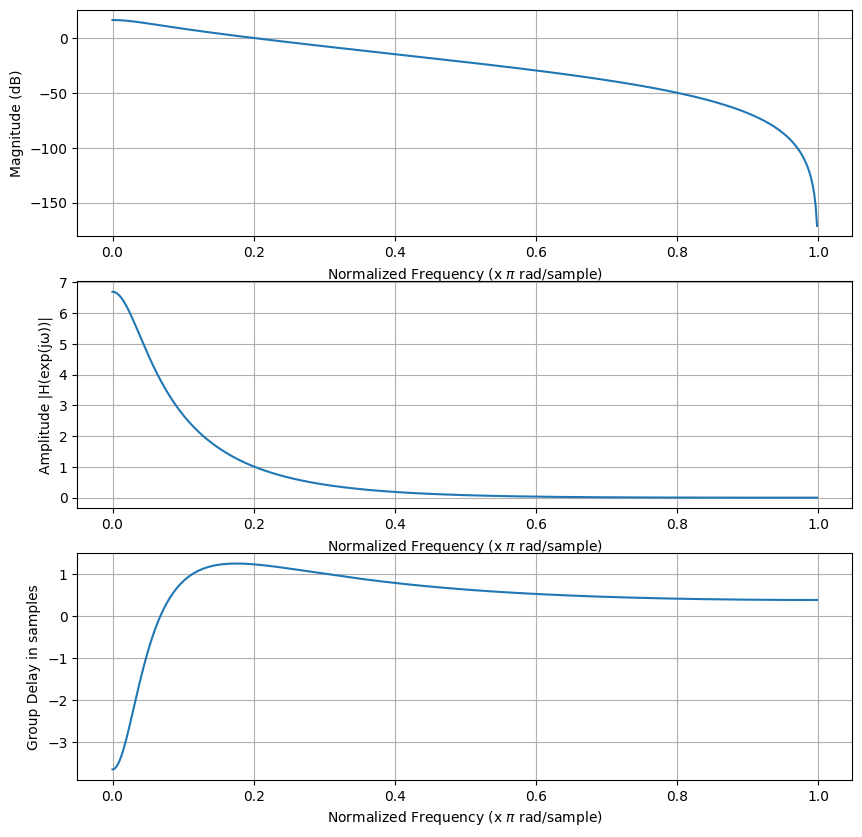

In [40]:
fs = 1 # sampling frequency in Hz: does not matter
Wp = 2*fs*np.tan(wp/2)
Ws = 2*fs*np.tan(ws/2)

# Find optimum N, Wc
Nm, Wcm = sig.buttord(wp=Wp, ws=Ws, gpass=-20*np.log10(d1), gstop=-20*np.log10(d2), analog=True)

Bm, Am = sig.butter(N=Nm, Wn=Wcm, analog=True) #Constructs the filter
Bzm, Azm = sig.bilinear(b=Bm, a=Am, fs=fs) #Analog -> Digital
w, Hm = sig.freqz(b=Bzm, a=Azm, worN=512)

w, Gdm = sig.group_delay((Bzm, Azm), w=512)

plt.figure(figsize=(10, 10))
plt.title("Exercise 1 - BT")
plt.subplot(3, 1, 1)
plt.plot(w/np.pi, 20*np.log10(abs(H))) # Divide with pi for easier check
plt.grid()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Normalized Frequency (x $\pi$ rad/sample)")

plt.subplot(3, 1, 2)
plt.plot(w/np.pi, abs(H))
plt.grid()
plt.ylabel('Amplitude |H(exp(jω))|')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.subplot(3, 1, 3)
plt.plot(w/np.pi, Gd)
plt.grid()
plt.ylabel('Group Delay in samples')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.show()

Περάστε το σήµα ϕωνής που σας δίνεται (speech.wav) µέσα από το παραπάνω ϕίλτρο (εντολή sig.lfilter).

<u>**Απάντηση**</u>


In [41]:
filename = 'speech.wav'
fs, s = wavfile.read('./' + filename)        # διαβάζουμε το συνοδευτικό wav αρχείο
s = s / (2**15)                              # κανονικοποίηση
Audio(s.T, rate=fs)                          # ακούμε! :)

Φιλτράρετέ το!

In [42]:
y = sig.lfilter(Bzm, Azm, s)                 # our filter

Ας το ακούσουμε!

In [43]:
Audio(y.T, rate=fs)                          # ακούμε! :)

---
---

# Άσκηση 2 - Σχεδίαση FIR Φίλτρων

Χρησιμοποιώντας Python, υλοποιήστε το παράδειγμα σχεδίασης ενός χαμηλοπερατού - με συχνότητα αποκοπής $\omega_{c} = \pi /2$ - FIR φίλτρου γραμμικής φάσης με χρήση παραθύρου Kaiser, που είδαμε στις διαλέξεις. Όπως θυμάστε, η φιλοσοφία της σχεδίασης έγκειται στην παραθυροποίηση της κρουστικής απόκρισης ενός ιδανικού φίλτρου (η οποία είναι άπειρης διάρκειας και μη αιτιατή).


Πιο συγκεκριμένα, οι προδιαγραφές του φίλτρου σας είναι

$$\omega_{p} = 0.4\pi \ \ \tag{24}$$
$$\omega_{s} = 0.6\pi \ \ \tag{25}$$
$$\delta = 0.001 \ \ \tag{26}$$

Γράψτε τον κώδικα που τις υλοποιεί παρακάτω.

<u>**Απάντηση**</u>

In [56]:
wp = 0.4 * np.pi
ws = 0.6 * np.pi
delta = 0.001

Η συχνότητα αποκοπής $\omega_{c}$ είναι
    $$\omega_{c} = \frac{\omega_{p} + \omega_{s}}{2} \tag{27}$$
Προγραματίστε το στην Python.

<u>**Απάντηση**</u>

In [57]:
Wc = (wp + ws) / 2

Οι παράμετροι του παραθύρου Kaiser δίνονται ως:
$$\Delta \omega = \omega_{s} - \omega_{p} \ \ \tag{28}$$
$$\Alpha = -20 \log_{10} \delta \ \ \tag{29}$$

$\begin{align}
\beta  = \left\{
            \begin{array}{lr}
                    0.1102(\Alpha - 8.7), & \Alpha > 50 \\
                    0.5842(\Alpha - 21)^{0.4} + 0.07886(\Alpha - 21), & 21 \leq \Alpha \leq 50 \\
                    0.0, & \Alpha < 21
            \end{array} \tag{30}
         \right.
\end{align}$

και η παράμετρος $M$ του παραθύρου (θέση τελευταίου μη μηδενικού δείγματος, δηλ. διάρκεια φίλτρου $M+1$) πρέπει να ικανοποιεί τη σχέση

$$M = \frac{A - 8}{2.285 \Delta \omega} \ \ \tag{31}$$

ενώ η καθυστέρηση θα είναι

$$\alpha = \frac{M}{2} \ \ \tag{32}$$

Προγραμματίστε τις παραπάνω εξισώσεις στην Python, με την ίδια φιλοσοφία με τις προηγούμενες υλοποιήσεις φίλτρων. Επιβεβαιώστε ότι για τις προδιαγραφές που σας δίνονται οι τιμές που λαμβάνετε είναι
$$\Delta \omega = 0.2 \pi , \Alpha = 60, \beta = 5.653, M = 36.3 \rightarrow 37, \alpha = 18.5 \ \ \tag{33}$$

<u>**Απάντηση**</u>


In [58]:
Dw =  ws - wp

A = -20 * np.log10(delta)

if A > 50:
    b = 0.1102 * (A - 8.7)
elif 21 <= A <= 50:
    b = 0.5842 * (A - 21)**0.4 + 0.07886 * (A - 21)
else:
    b = 0.0

M = (A - 8) / (2.285 * Dw)
M = np.ceil(M)  #M must be integer

a = M/2

print(f"Δω = {Dw/2}=pi, A = {A}, beta={b}, M={M}, a={a}")
# Should be : Δω = 0.3141592653589793=pi, A = 60.0, beta=5.65326, M=37.0, a=18.5

Δω = 0.3141592653589793=pi, A = 60.0, beta=5.65326, M=37.0, a=18.5


Το γινόμενο του παραθύρου Kaiser με την ιδανική κρουστική απόκριση του χαμηλοπερατού φίλτρου γραμμικής φάσης (δηλ. η επιθυμητή κρουστική απόκριση) στο πεδίο του χρόνου δίνεται ώς

$\begin{align}
h[n] = \left\{
            \begin{array}{lr}
                \displaystyle \frac{\sin (\omega_{c}(n - \alpha))}{\pi(n - \alpha)} \frac{\Iota_{0}[ \beta (1 - [(n-\alpha)/ \alpha]^{2})^{1/2}]}{\Iota_{0}(\beta)}, & 0 \leq n \leq M \\
                0 , & αλλού
            \end{array} \tag{34}
         \right.
\end{align}$

Πώς προέκυψε το παραπάνω? Από το γινόμενο

$$ h[n] = w_{kaiser}[n]h_d[n] \tag{35}$$

με $$h_d[n] = \frac{\sin\left(\omega_c\left(n-\alpha\right)\right)}{\pi \left(n-\alpha\right)} \tag{36}$$

η κρουστική απόκριση ενός ιδανικού χαμηλοπερατού φίλτρου γραμμικής φάσης

$$H_d(e^{j\omega}) = \left\{
    \begin{array}{ll}
        e^{-j\omega \alpha}, & |\omega| < \omega_c \\
        0, & \text{ αλλού}
\end{array}\right. \tag{37}$$

και $$w_{kaiser}[n] = \frac{\Iota_{0}[ \beta (1 - [(n-\alpha)/ \alpha]^{2})^{1/2}]}{\Iota_{0}(\beta)}, \: \: 0 \leq n \leq M \tag{38}$$

το παράθυρο Kaiser που σχεδιάσαμε!

Χρησιμοποιήστε τη συνάρτηση $\textrm{sp.iv}$ για να παράγετε την τροποποιημένη συνάρτηση Bessel μηδενικού βαθμού και πρώτου είδους $\Iota_{0}(\centerdot)$, με ορίσματα τα $\alpha, \beta$ που βρήκατε παραπάνω.

<u>**Απάντηση**</u>


In [59]:
from scipy.special import iv
# Implement numerator and denominator of w[n]
n = [i for i in range(0, int(M)+1)]
I0_num = iv(0, b * np.sqrt(1 - ((n - a) / a)**2))
I0_den = iv(0, b)
w = I0_num/I0_den

# Ideal impulse response
hd = ((np.sin(Wc*(n-a)))/(np.pi*(n-a)))

# Kaiser-windowed hd[n] = h[n]
h = h = w * hd

Με βάση τα παραπάνω:
1. Τρέξτε το παρακάτω κελί για να δείτε την απόκριση πλάτους και την καθυστέρηση ομάδας, αντίστοιχα.

**Τι τύπου φίλτρο γραμμικής φάσης φτιάξατε; (I, II, III, IV ?)**

<u>**Τυπου IV**</u>

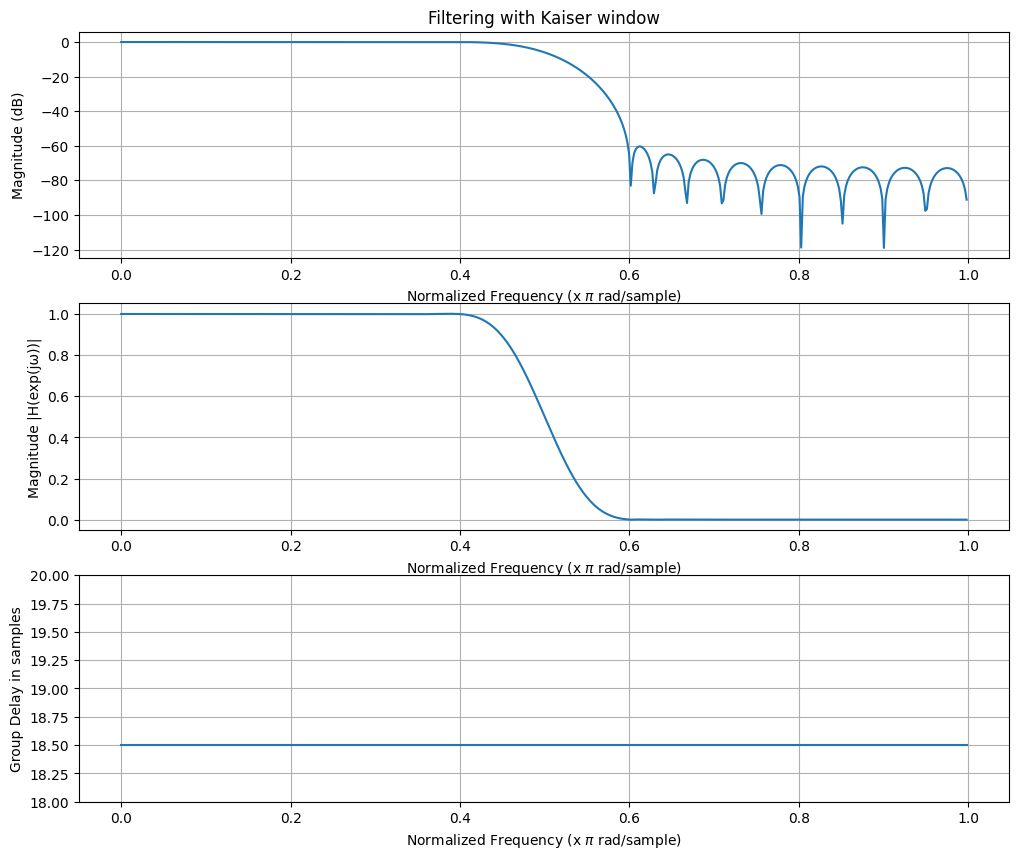

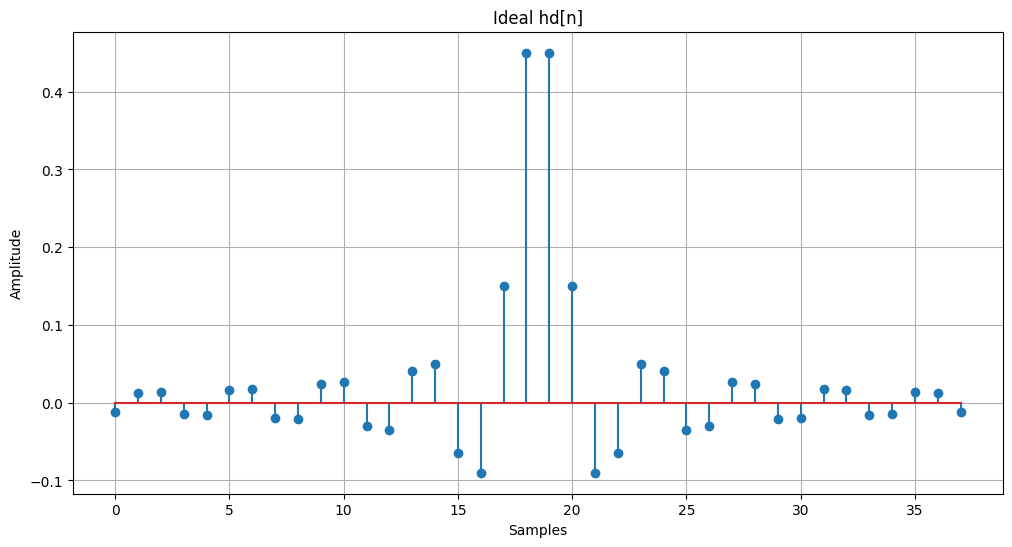

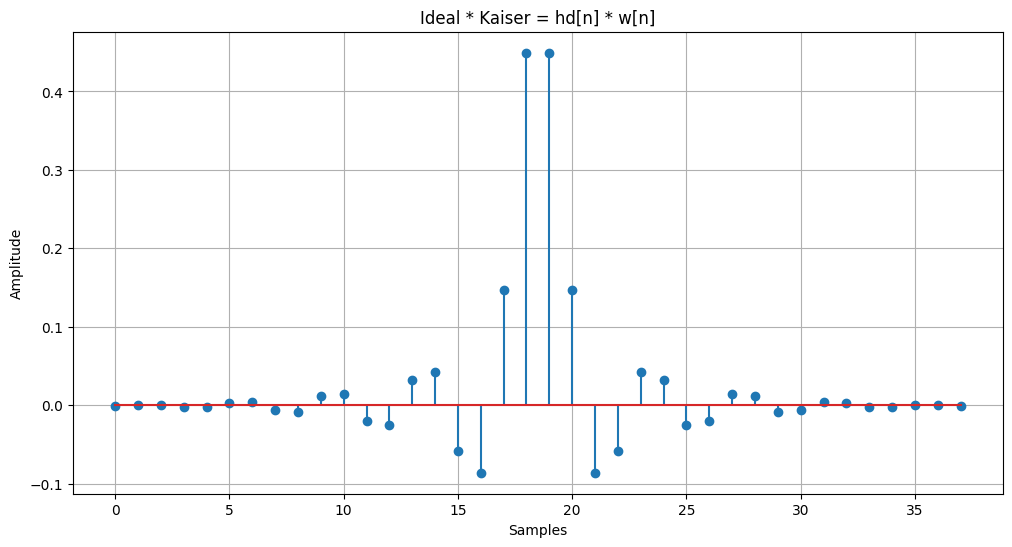

In [60]:
Az = 1
Bz = h

w, H = sig.freqz(b=Bz.T, a=Az, worN=512)
w, Gd = sig.group_delay((Bz.flatten(), Az), w=512)

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.title("Filtering with Kaiser window")
plt.plot(w/np.pi, 20*np.log10(abs(H))) # Divide with pi for easier check
plt.grid()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Normalized Frequency (x $\pi$ rad/sample)")

plt.subplot(3, 1, 2)
plt.plot(w/np.pi, abs(H))
plt.grid()
plt.ylabel('Magnitude |H(exp(jω))|')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.subplot(3, 1, 3)
plt.plot(w/np.pi, Gd)
plt.grid()
plt.ylabel('Group Delay in samples')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')
plt.ylim(18, 20)

plt.show()

plt.figure(figsize=(12, 6))
plt.stem(n, hd.reshape(-1))
plt.grid(True)
plt.title("Ideal hd[n]")
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


plt.figure(figsize=(12, 6))
plt.stem(n, h.reshape(-1))
plt.grid(True)
plt.title("Ideal * Kaiser = hd[n] * w[n]")
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

**Απάντηση για το είδος του φίλτρου:**

Παρατηρούμε ότι ...




2. Χρησιµοποιήστε τώρα ένα απλό τετραγωνικό παράθυρο (διάρκειας $M + 1$, δηλ. η κρουστική του απόκριση αποτελείται από $M + 1$ άσσους) αντί για Kaiser παράθυρο, και σχεδιάστε την απόκριση πλάτους και την καθυστέρηση οµάδας του ϕίλτρου γραµµικής ϕάσης που λαµβάνετε.

**Συγκρίνετε την απόκριση πλάτους του ϕίλτρου που παίρνετε τώρα σε σχέση µε αυτό που πήρατε µε το παράθυρο Kaiser**.

<u>**Απάντηση**</u>

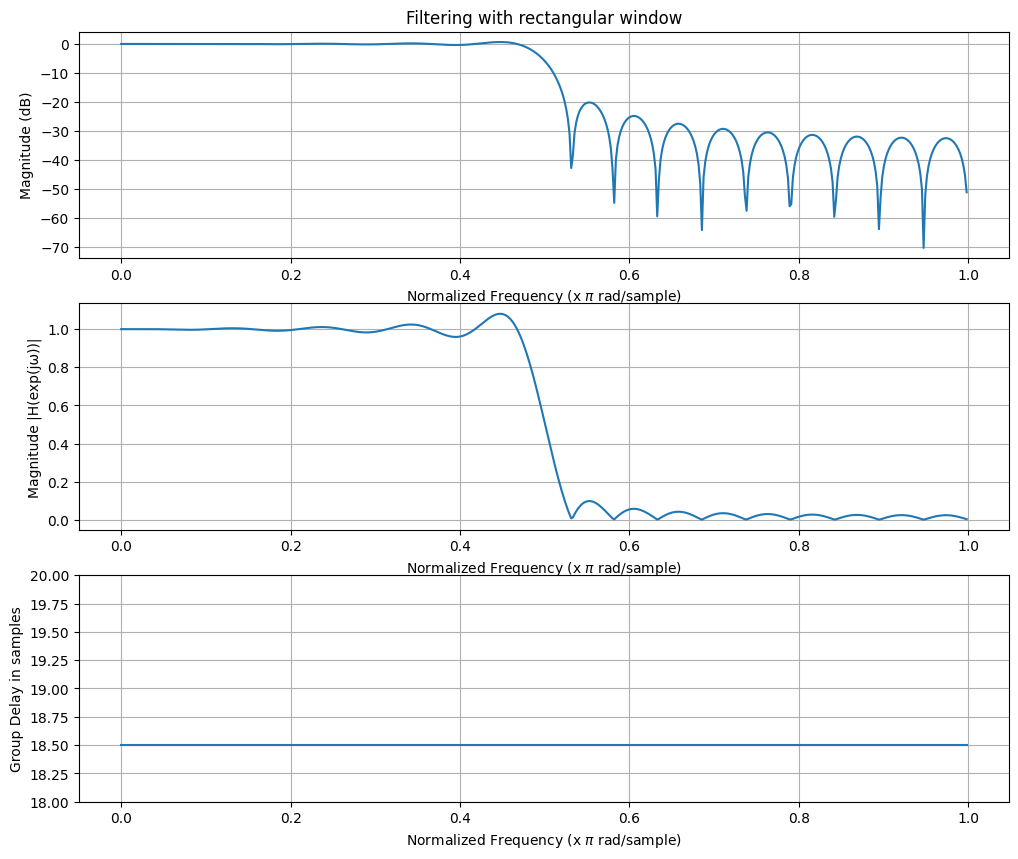

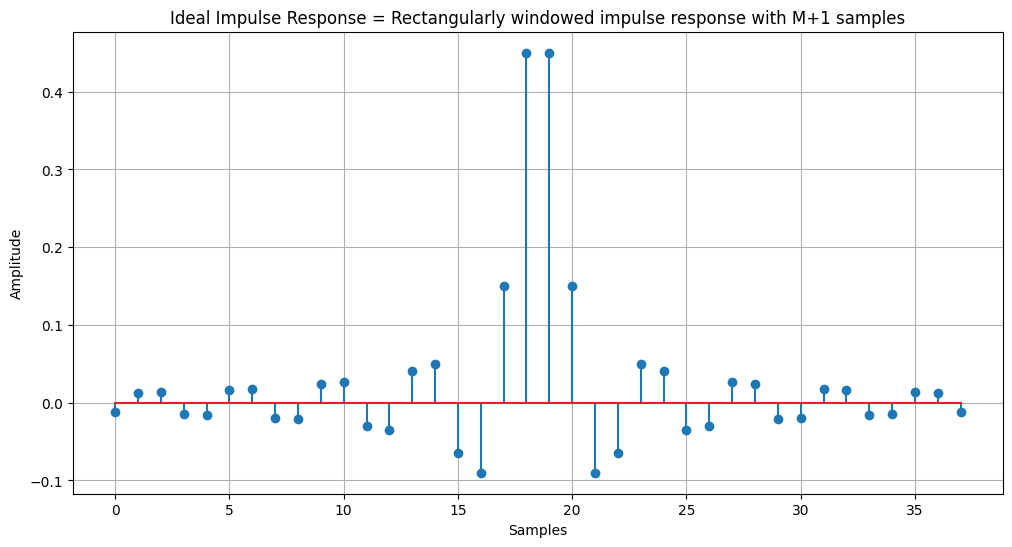

In [61]:
w_rect = np.ones((1, int(M)+1))
hd = (np.sin(Wc*(n-a)))/(np.pi * (n-a))

A = 1
B = hd

w, H = sig.freqz(b=B, a=A, worN=512)
w, Gd = sig.group_delay((B, A), w=512)

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.title("Filtering with rectangular window")
plt.plot(w/np.pi, 20*np.log10(abs(H))) # Divide with pi for easier check
plt.grid()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Normalized Frequency (x $\pi$ rad/sample)")

plt.subplot(3, 1, 2)
plt.plot(w/np.pi, abs(H))
plt.grid()
plt.ylabel('Magnitude |H(exp(jω))|')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')

plt.subplot(3, 1, 3)
plt.plot(w/np.pi, Gd)
plt.grid()
plt.ylabel('Group Delay in samples')
plt.xlabel('Normalized Frequency (x $\pi$ rad/sample)')
plt.ylim(18, 20)

plt.show()


plt.figure(figsize=(12, 6))
plt.stem(n, hd.reshape(-1))
plt.grid(True)
plt.title("Ideal Impulse Response = Rectangularly windowed impulse response with M+1 samples")
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


Συγκρίνοντας την απόκριση πλάτους των παραπάνω φίλτρων, παρατηρούμε τα εξής:
* η απόκριση πλάτους του φίλτρου με παράθυρο Kaiser παρουσιαζει μεγαλυτερ αποκριση στην περιοχη μεταβασης
και μικροτερους πλευρικους λοβους.

* Το εύρος του κεντρικού λοβού για το φίλτρο με παράθυρο Kaiser είναι πιο στενο ενώ για το τετραγωνικό παράθυρο είναι πιο φαρδυ

* Το πλάτος των πλευρικών λοβών για το φίλτρο με παράθυρο Kaiser είναι χαμηλοτερο ενώ για το τετραγωνικό παράθυρο είναι ψυλοτερο

Έτσι, το φίλτρο με παράθυρο Kaiser θα έχει καλυτερη αποδοση στην αποκοπυ ανεπιθυμητων συχνοτητων και μικροτερη διαρροη σηματος στην ανεπιθυμητη ζωνη συχνοτητων.

3. Περάστε το σήµα ϕωνής που σας δίνεται (speech.wav) µέσα από το παραπάνω χαµηλοπερατό ϕίλτρο µε παράθυρο Kaiser (εντολή sig.lfilter) που ϕτιάξατε.

<u>**Απάντηση**</u>

In [62]:
filename = 'speech.wav'
fs, s = wavfile.read('./' + filename)        # διαβάζουμε το συνοδευτικό wav αρχείο
s = s / (2**15)                              # κανονικοποίηση
Audio(s.T, rate=fs)                          # ακούμε! :)

Φιλτράρουμε:

In [63]:
y = sig.lfilter(np.squeeze(Bz), Az, s)     # our filter

Ακούμε! :)

In [64]:
Audio(y.T, rate=fs)                          # ακούμε! :)

---
---

### Για την παράδοση της άσκησης, παραδώστε συμπληρωμένο αυτό το *Python* αρχείο, με εκτελεσμένο κάθε κελί κώδικα, μετονομασμένο σε

### <center> Lab4_AM.ipynb

### Η παράδοση γίνεται μέσω e-mail στα
<br>

### <center> csd4390@csd.uoc.gr

### <center> και

### <center> csd4262@csd.uoc.gr

### Σε περίπτωση που έχετε ομάδα 2 ατόμων, το όνομα του αρχείο θα πρέπει να είναι

### <center> Lab4_AM1_ΑΜ2.ipynb

### και πρέπει να αποσταλεί ΜΟΝΟ από ένα (οποιοδήποτε) μέλος της ομάδας.

## <center> Ανάθεση: 8/12/2023
## <center> Προθεσμία: 22/12/2023, 23:59:59